In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_wine = pd.read_csv('wine.csv', header=None)

In [3]:
df_wine.columns = [ 'Class label','Alcohol','Malic acid', 'Ash', 'Alcalinity of ash','Magnesium', 'Total phenols', 'Flavanoids', 
                   'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']
print('Class labels', np.unique(df_wine['Class label']))

Class labels [1 2 3]


In [4]:
df_wine.describe()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


Alcalinity, magnesium, color y proline tienen desviaciones estandar grandes, quiza sean elementos que ayuden a inferir

In [5]:
from sklearn.preprocessing import MinMaxScaler

In [6]:
X= df_wine[df_wine.columns[1:]]
y= df_wine['Class label']

In [7]:
mms = MinMaxScaler()
X= mms.fit_transform(X)
df_wine[df_wine.columns[1:]] = X

In [8]:
df_wine.describe()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,0.518584,0.315484,0.538244,0.458502,0.323278,0.453487,0.356386,0.437460,0.372523,0.322363,0.388170,0.491460,0.334446
std,0.775035,0.213639,0.220780,0.146708,0.172142,0.155244,0.215811,0.210730,0.234818,0.180555,0.197806,0.185831,0.260070,0.224613
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.350658,0.170455,0.454545,0.340206,0.195652,0.262931,0.182489,0.264151,0.264984,0.165529,0.245935,0.244505,0.158702
50%,2.000000,0.531579,0.222332,0.534759,0.458763,0.304348,0.474138,0.378692,0.396226,0.361199,0.290956,0.394309,0.553114,0.282097
75%,3.000000,0.696711,0.462945,0.640374,0.561856,0.402174,0.627586,0.534810,0.580189,0.485804,0.419795,0.520325,0.695971,0.504280
max,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
wine_byclass = df_wine.groupby(by='Class label')

In [10]:
means = wine_byclass.mean()
temp = pd.DataFrame(means)

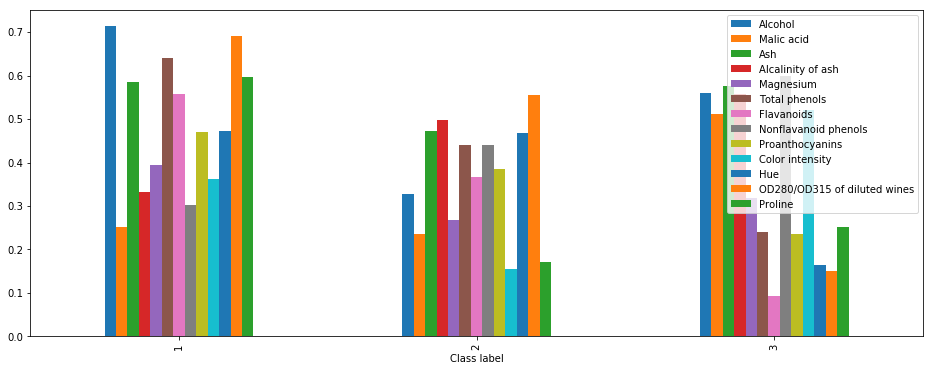

In [11]:
temp.plot.bar(figsize=(16,6), legend=True)

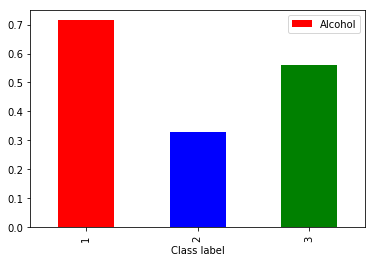

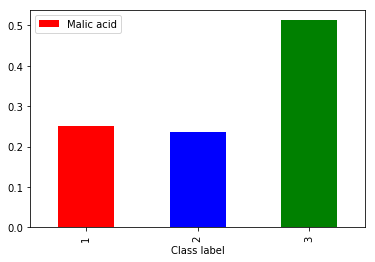

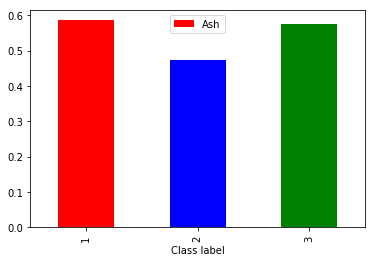

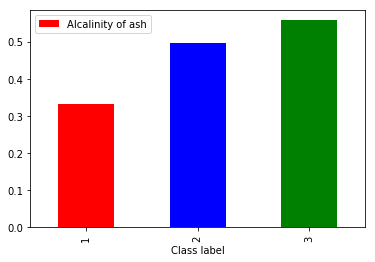

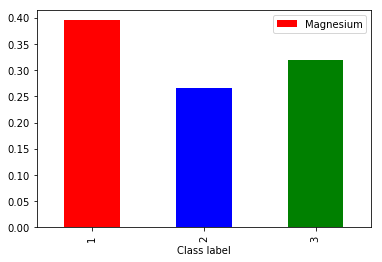

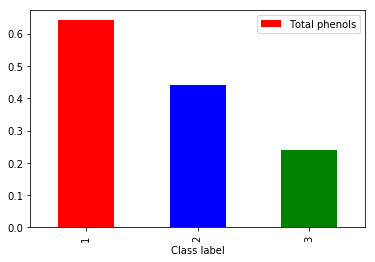

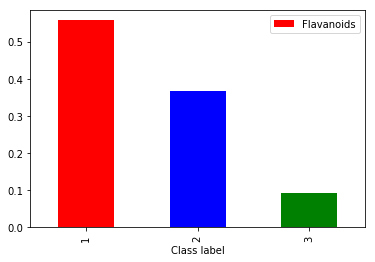

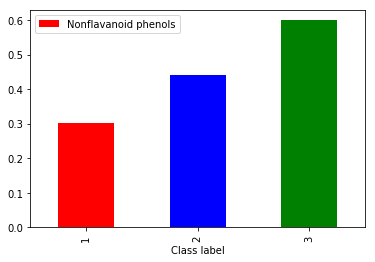

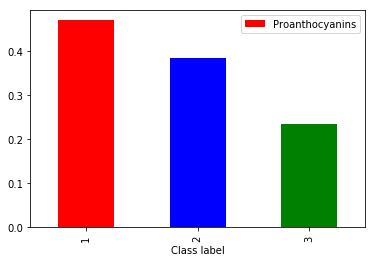

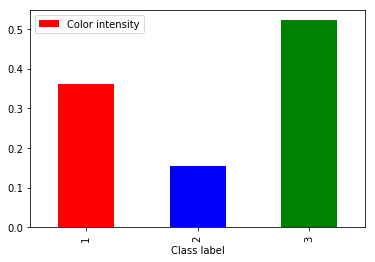

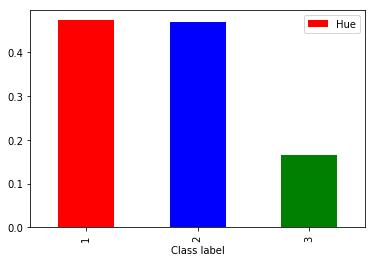

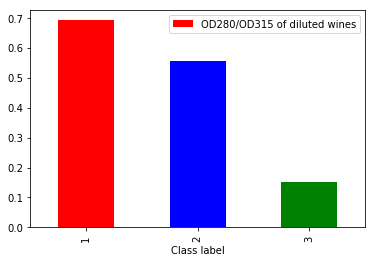

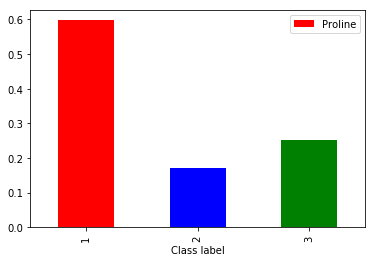

In [18]:
[temp.plot.bar(y = c, color=['red','blue','green']) for c in temp.columns]

Alcohol, Alcalinity of ash, magnesium, total phenols, flavanoids, nonflavanoid phenols, Proanthocyanins, Color intensity,OD280/OD315 of diluted wines and proline are important features that can help to predict correctly. maybe magnesium and proline can no be so important

After seeing the values of means for the different features a tree based solution could achieve great performance and accuracy, so I will test several Classification Algorithms in order to check this

### Classification ML

In [21]:
from sklearn import model_selection, metrics

In [22]:
X_train,X_test,y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2, random_state = 0)

In [39]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression();
lr.fit(X_train, y_train)
y_hat = lr.predict(X_test)
print('Accuracy: %f' % (metrics.accuracy_score(y_test,y_hat)))

Accuracy: 0.972222


In [41]:
from sklearn import tree
tr = tree.DecisionTreeClassifier()
tr.fit(X_train, y_train)
y_tree = tr.predict(X_test)
print('Accuracy: %f' % (metrics.accuracy_score(y_test,y_tree)))

Accuracy: 0.972222


In [42]:
from sklearn import ensemble
fst = ensemble.RandomForestClassifier()
fst.fit(X_train, y_train)
y_fst = fst.predict(X_test)
print('Accuracy: %f' % (metrics.accuracy_score(y_test,y_fst)))

Accuracy: 1.000000


In [13]:
def scatterPlot(X,Y,df):
    color = {1:'red', 2:'blue', 3:'green'}
    fig = plt.figure()
    for i in range(1,4):
        plt.scatter(df[df['Class label']==i][X], df[df['Class label']==i][Y], c= color[i])
        plt.xlabel(X)
        plt.ylabel(Y)
    plt.show()

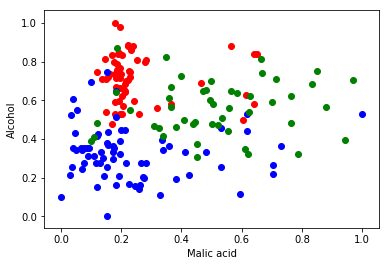

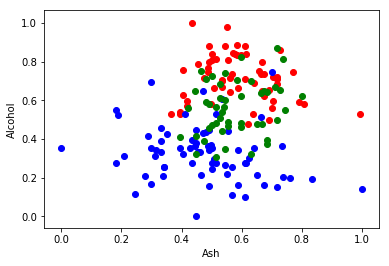

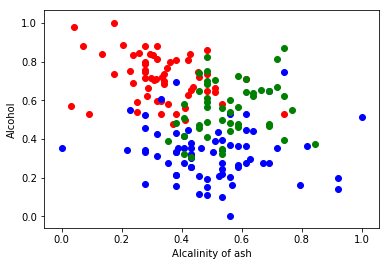

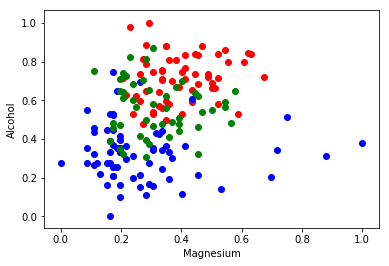

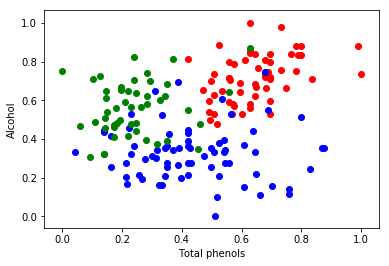

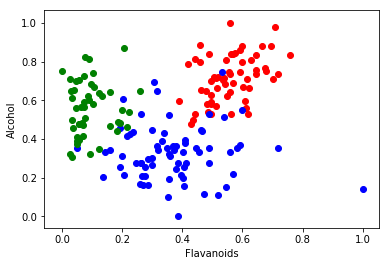

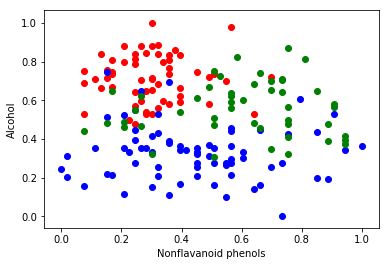

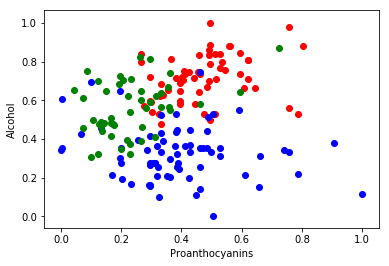

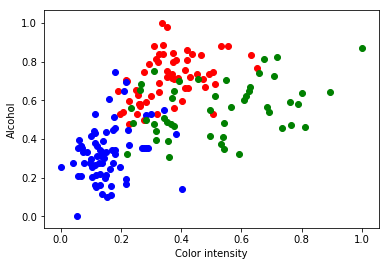

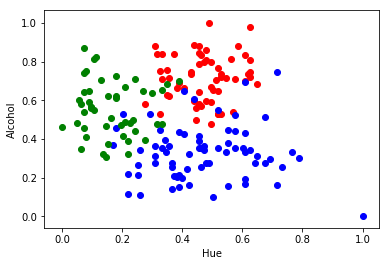

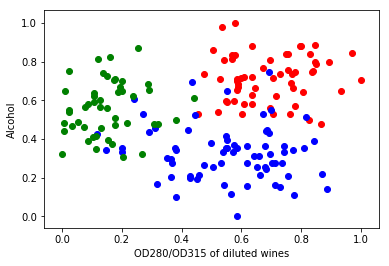

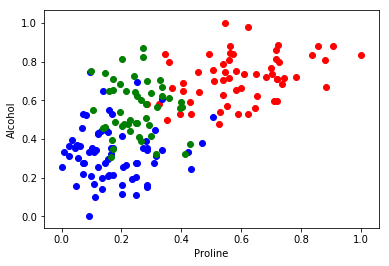

[None, None, None, None, None, None, None, None, None, None, None, None]

In [14]:
[scatterPlot(c,'Alcohol', df_wine) for c in df_wine.columns[2:]]

##